In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Data Import
data = pd.read_csv('amazon.csv', encoding='latin1')
data.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [4]:
data.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01
6448,2011,Tocantins,Dezembro,105.0,2011-01-01
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB
None


In [13]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of       year      state      month  number        date
0     1998       Acre    Janeiro     0.0  1998-01-01
1     1999       Acre    Janeiro     0.0  1999-01-01
2     2000       Acre    Janeiro     0.0  2000-01-01
3     2001       Acre    Janeiro     0.0  2001-01-01
4     2002       Acre    Janeiro     0.0  2002-01-01
5     2003       Acre    Janeiro    10.0  2003-01-01
6     2004       Acre    Janeiro     0.0  2004-01-01
7     2005       Acre    Janeiro    12.0  2005-01-01
8     2006       Acre    Janeiro     4.0  2006-01-01
9     2007       Acre    Janeiro     0.0  2007-01-01
10    2008       Acre    Janeiro     0.0  2008-01-01
11    2009       Acre    Janeiro     0.0  2009-01-01
12    2010       Acre    Janeiro     1.0  2010-01-01
13    2011       Acre    Janeiro     0.0  2011-01-01
14    2012       Acre    Janeiro     0.0  2012-01-01
15    2013       Acre    Janeiro     0.0  2013-01-01
16    2014       Acre    Janeiro     0.0  2014-01-01
17 

In [14]:
print(data.isnull().sum())

year      0
state     0
month     0
number    0
date      0
dtype: int64


In [17]:
statistics = data['number'].describe().reset_index()
statistics.style.format({"number": "{:20,.0f}"}).hide_index()

index,number
count,"6,454"
mean,108
std,191
min,0
25%,3
50%,24
75%,113
max,998


In [45]:
data['month'].replace(to_replace = 'Janeiro', value = 'Jan', inplace = True)
data['month'].replace(to_replace = 'Fevereiro', value = 'Feb', inplace = True)
data['month'].replace(to_replace = 'Março', value = 'Mar', inplace = True)
data['month'].replace(to_replace = 'Abril', value = 'Apr', inplace = True)
data['month'].replace(to_replace = 'Maio', value = 'May', inplace = True)
data['month'].replace(to_replace = 'Junho', value = 'Jun', inplace = True)
data['month'].replace(to_replace = 'Julho', value = 'Jul', inplace = True)
data['month'].replace(to_replace = 'Agosto', value = 'Aug', inplace = True)
data['month'].replace(to_replace = 'Setembro', value = 'Sep', inplace = True)
data['month'].replace(to_replace = 'Outubro', value = 'Oct', inplace = True)
data['month'].replace(to_replace = 'Novembro', value = 'Nov', inplace = True)
data['month'].replace(to_replace = 'Dezembro', value = 'Dec', inplace = True)

In [43]:
# NUMBER OF FIRES= NUMBER OF ROWS
rows = len(data)
print(rows)

6454


In [46]:
year_mo_state = data.groupby(by = ['year','state', 'month']).sum().reset_index()

year_mo_state.head()

,year,state,month,number
0,1998,Acre,April,0.0
1,1998,Acre,August,130.0
2,1998,Acre,Dec,7.0
3,1998,Acre,February,0.0
4,1998,Acre,January,0.0


C:\Users\bodic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


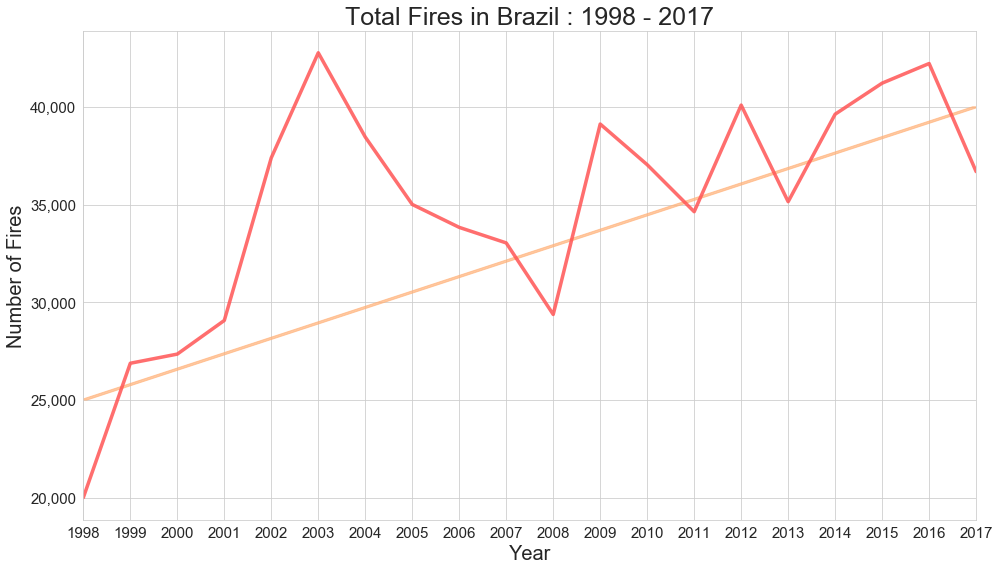

In [47]:
sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(16,9))

ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state, estimator = 'sum', color = '#FF5555', 
                  lw = 3.5, err_style = None , alpha = 0.85)

import pylab as p
p.arrow( 1998, 25000, 19, 15000, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
       width = 0.15, alpha = 0.7, shape = "full")

plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

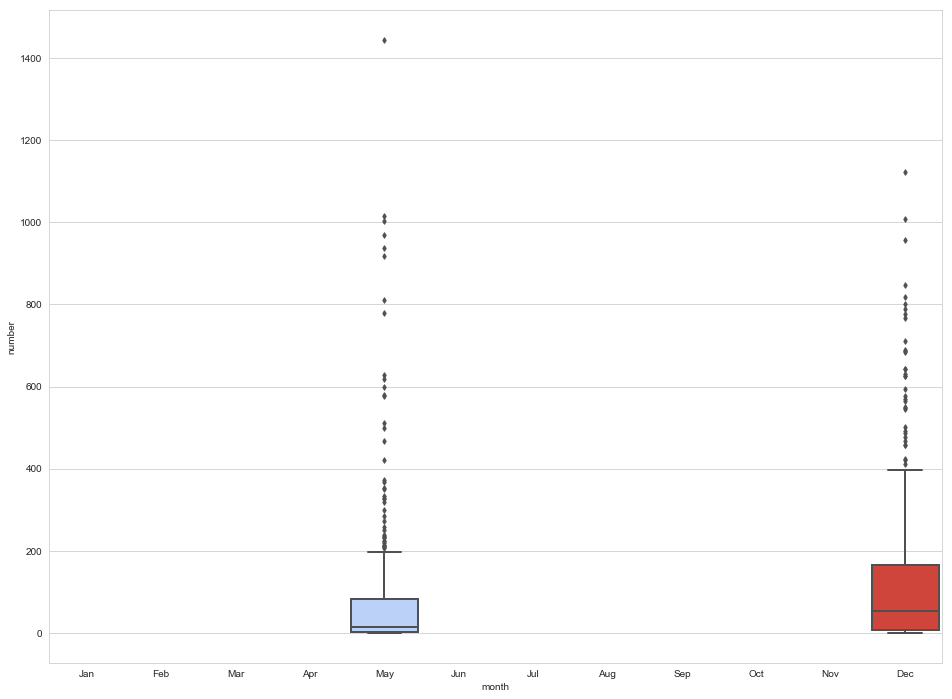

In [50]:
plt.figure(figsize=(16,12))

sns.boxplot(x = 'month', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], 
            y = 'number', data = year_mo_state, palette = "coolwarm", saturation = 1, width = 0.9, fliersize=4, linewidth=2)


C:\Users\bodic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


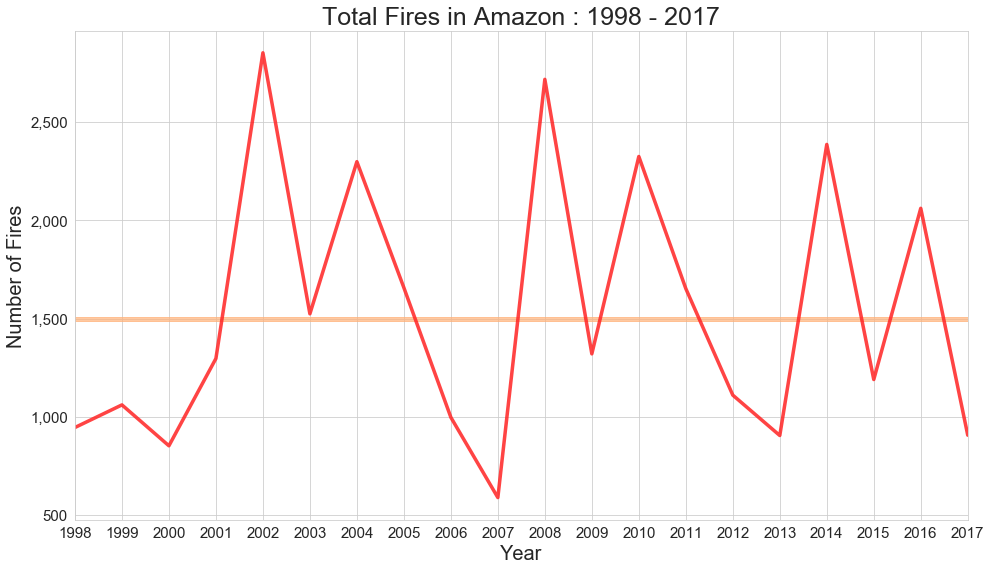

In [51]:
year_mo_state_Amazon = data[data['state'] == 'Amazonas'].groupby(by = ['year','state', 'month']).sum().reset_index()

plt.figure(figsize=(16,9))

ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_Amazon, estimator = 'sum', color = '#FF2323', lw = 3.5, 
                  err_style = None, alpha = 0.85)

p.arrow( 1998, 1500, 19, 0, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
       width = 20, alpha = 0.7, shape = "full")

plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

In [52]:
states_fires = data.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(10).reset_index()
states_fires = states_fires.sort_values(by = 'number', ascending = True)

states_fires

,state,number
9,Amazonas,30650.129
8,Tocantins,33707.885
7,Minas Gerais,37475.258
6,Goias,37695.520
5,Piau,37803.747
4,Bahia,44746.226
3,Rio,45160.865
2,Sao Paulo,51121.198
1,Paraiba,52435.918
0,Mato Grosso,96246.028


No handles with labels found to put in legend.


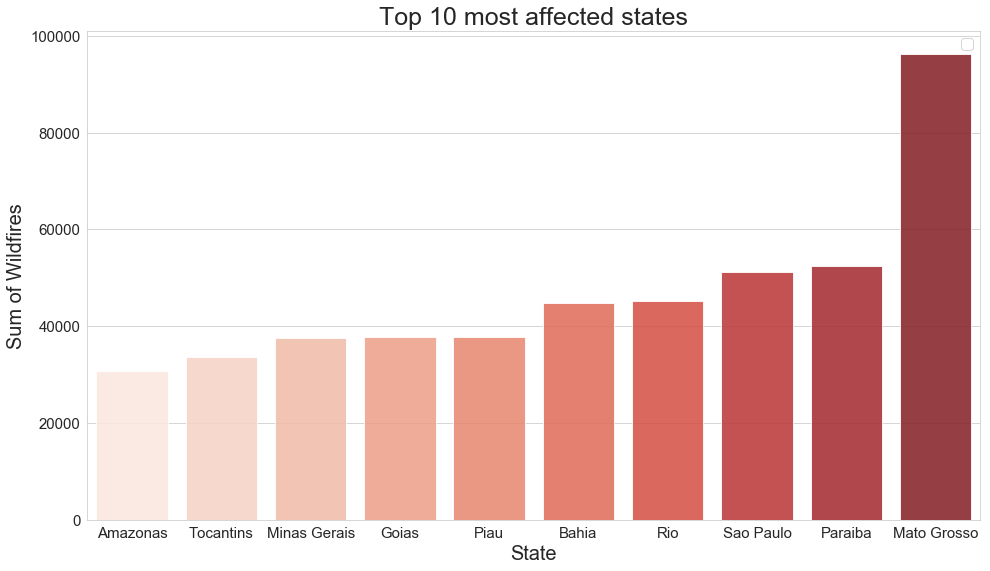

In [53]:
plt.figure(figsize = (16, 9))

ax = sns.barplot(x = states_fires['state'], y = states_fires['number'], palette = "Reds", alpha = 0.85)

plt.title("Top 10 most affected states", fontsize = 25)
plt.xlabel("State", fontsize = 20)
plt.ylabel("Sum of Wildfires", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

In [66]:
total_fires_amazonas = data[data['state'] == 'Amazonas']['number'].sum()

print(total_fires_amazonas)

30650.129


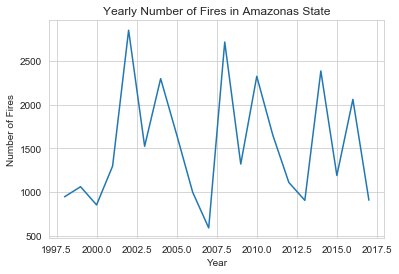

In [65]:
data_amazonas_yearly = data[data['state'] == 'Amazonas'].groupby(['year'])['number'].sum()

plt.plot(data_amazonas_yearly.index, data_amazonas_yearly.values)
plt.title('Yearly Number of Fires in Amazonas State')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()

C:\Users\bodic\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


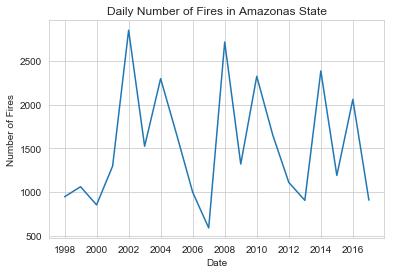

In [73]:
day_amazonas = data[data['state'] == 'Amazonas']

# convert the 'date' column to datetime format
day_amazonas['date'] = pd.to_datetime(day_amazonas['date'])

# group the dataframe by date and sum the 'number' column for each date
daily = day_amazonas.groupby('date')['number'].sum().reset_index()

# create the line plot
plt.plot(daily['date'], daily['number'])
plt.title('Daily Number of Fires in Amazonas State')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.show()

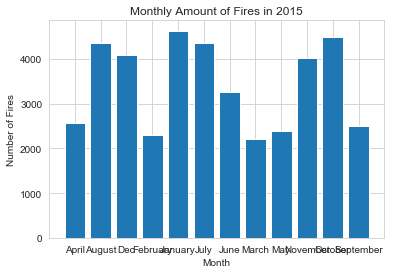

In [75]:
data_2015 = data[data['year'] == 2015]

data_monthly = data_2015.groupby('month')['number'].sum().reset_index()

plt.bar(data_monthly['month'], data_monthly['number'])
plt.title('Monthly Amount of Fires in 2015')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

In [76]:
data_avg = data.groupby(['state', 'year'])['number'].mean().reset_index()

data_avg_state = data_avg.groupby('state')['number'].mean().reset_index()

data_avg_state_sorted = data_avg_state.sort_values('number', ascending=False)

print(data_avg_state_sorted)

               state      number
20         Sao Paulo  213.967442
10       Mato Grosso  201.584779
4              Bahia  186.988750
15              Piau  158.079248
8              Goias  157.663580
11      Minas Gerais  156.746113
22         Tocantins  140.971854
3           Amazonas  128.052395
5              Ceara  127.751399
12           Paraiba  109.819660
9           Maranhao  105.240141
13              Pará  102.577743
19    Santa Catarina  102.391050
14        Pernambuco  102.272727
18           Roraima  102.021520
2              Amapa   91.519824
17          Rondonia   84.788680
0               Acre   77.167712
16               Rio   63.262691
7     Espirito Santo   27.363636
1            Alagoas   19.350000
6   Distrito Federal   14.992803
21           Sergipe   13.515909


In [81]:
dec_fire = data[data['month'] == 'Dec']

state_names = dec_fire['state'].unique()

print(state_names)

['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
